In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.api as sm
import datetime
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools  import adfuller
from pandas.plotting import autocorrelation_plot  as ap
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error as mse
from pmdarima import auto_arima 
from pmdarima.arima import ADFTest
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.holtwinters import Holt,SimpleExpSmoothing,ExponentialSmoothing,HoltWintersResults
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
import statsmodels.api as sm
from sklearn.metrics import cohen_kappa_score, make_scorer
import warnings
warnings.filterwarnings('ignore') 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.stats.diagnostic as dg
from statsmodels.stats.stattools import durbin_watson 
from pyearth import Earth

In [ ]:
#!pip install pmdarima
#!pip install pycaret
#!pip install sklearn-contrib-py-earth

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Created wheel for sklearn-contrib-py-earth: filename=sklearn_contrib_py_earth-0.1.0-cp36-cp36m-linux_x86_64.whl size=3894134 sha256=dff4f8b13ba294302b42be7491caa0dc5c3a783fbd9a1a02c244e122a441539b
  Stored in directory: /root/.cache/pip/wheels/b7/8b/9c/4741513102ce3bd0f0227353dacdfbe9a5b0e47c261e45510b
Successfully built sklearn-contrib-py-earth


In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving BAJFINANCE.NS.csv to BAJFINANCE.NS (1).csv


{'BAJFINANCE.NS.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2015-01-01,348.394989,449.239990,339.220001,405.054993,373.992950,12293830\n2015-02-01,409.899994,439.885010,396.500000,410.709991,379.214294,5212560\n2015-03-01,439.049988,447.700012,390.114990,410.845001,379.338959,5849590\n2015-04-01,415.799988,469.899994,391.350006,404.429993,373.415894,6898600\n2015-05-01,404.429993,460.000000,391.959991,421.654999,389.319977,7366890\n2015-06-01,428.000000,549.900024,417.000000,544.340027,502.596802,11982100\n2015-07-01,545.000000,566.000000,495.119995,551.130005,508.866089,16887540\n2015-08-01,552.489990,5065.000000,475.125000,4967.250000,4749.937500,15562263\n2015-09-01,502.119995,527.400024,467.704987,513.125000,490.676300,16359020\n2015-10-01,514.000000,5120.149902,491.299988,4998.000000,4779.342285,13813435\n2015-11-01,523.299988,5599.000000,517.510010,5541.000000,5298.586426,7871534\n2015-12-01,551.500000,604.000000,538.070007,600.994995,574.702087,7918490\n2016-01-01,601.609

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_price=pd.read_csv('BAJFINANCE.NS.csv',parse_dates=['Date'], index_col='Date',date_parser=dateparse)

In [ ]:
stock_price

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,348.394989,449.239990,339.220001,405.054993,373.992950,12293830
2015-02-01,409.899994,439.885010,396.500000,410.709991,379.214294,5212560
2015-03-01,439.049988,447.700012,390.114990,410.845001,379.338959,5849590
2015-04-01,415.799988,469.899994,391.350006,404.429993,373.415894,6898600
2015-05-01,404.429993,460.000000,391.959991,421.654999,389.319977,7366890
2015-06-01,428.000000,549.900024,417.000000,544.340027,502.596802,11982100
2015-07-01,545.000000,566.000000,495.119995,551.130005,508.866089,16887540
2015-08-01,552.489990,5065.000000,475.125000,4967.250000,4749.937500,15562263
2015-09-01,502.119995,527.400024,467.704987,513.125000,490.676300,16359020


In [ ]:
stock_price_copy=stock_price.copy()

In [ ]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2015-01-01 to 2019-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       60 non-null     float64
 1   High       60 non-null     float64
 2   Low        60 non-null     float64
 3   Close      60 non-null     float64
 4   Adj Close  60 non-null     float64
 5   Volume     60 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 3.3 KB


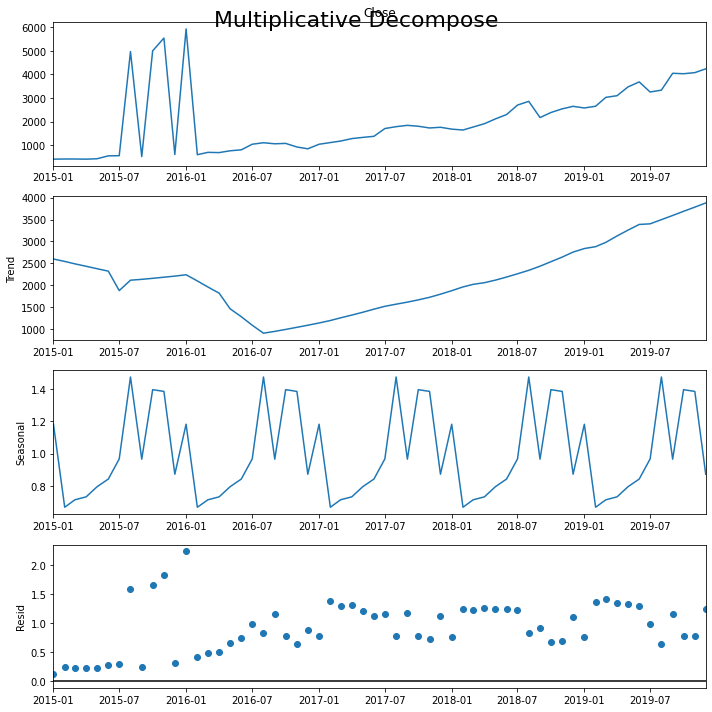

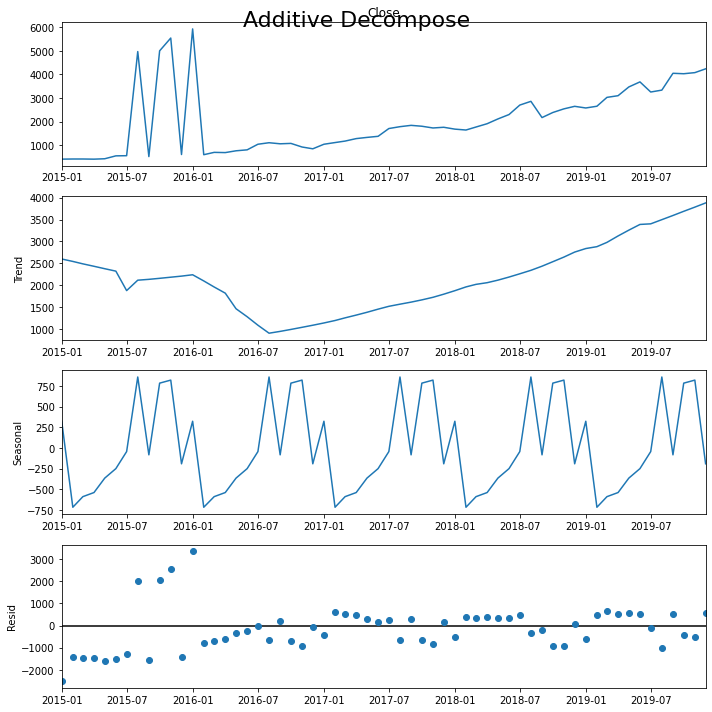

In [ ]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(stock_price['Close'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(stock_price['Close'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [ ]:
adf_test=ADFTest(alpha=0.05)
adf_test.should_diff(stock_price['Close'])

(0.2675440169058573, True)

Testing for stationarity


In [ ]:
X = stock_price['Open']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
 #pvalues indicate ts is not stationarity ,time series is required to me made stationary

ADF Statistic: 4.472652
p-value: 1.000000
Critical Values:
	1%: -3.568
	5%: -2.921
	10%: -2.599


In [ ]:
#first order differencing
X=X.diff(1)

In [ ]:
X.dropna(inplace=True)
print(X)

Date
2015-02-01     61.505005
2015-03-01     29.149994
2015-04-01    -23.250000
2015-05-01    -11.369995
2015-06-01     23.570007
2015-07-01    117.000000
2015-08-01      7.489990
2015-09-01    -50.369995
2015-10-01     11.880005
2015-11-01      9.299988
2015-12-01     28.200012
2016-01-01     50.109985
2016-02-01      5.090027
2016-03-01    -10.679992
2016-04-01     97.880004
2016-05-01     -6.500000
2016-06-01     65.399964
2016-07-01     52.200012
2016-08-01    241.000000
2016-09-01     57.050049
2016-10-01    -34.050049
2016-11-01     18.000000
2016-12-01   -161.000000
2017-01-01    -74.000000
2017-02-01    187.000000
2017-03-01     81.000000
2017-04-01     50.050049
2017-05-01    106.149902
2017-06-01     57.800049
2017-07-01     46.000000
2017-08-01    329.900024
2017-09-01     80.099976
2017-10-01     48.050049
2017-11-01    -28.450073
2017-12-01    -72.599976
2018-01-01     22.500000
2018-02-01    -77.699951
2018-03-01    -46.800049
2018-04-01    134.000000
2018-05-01    138.69

In [ ]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
 #this time pvalues indicate that the time series Stationary.

ADF Statistic: -7.604451
p-value: 0.000000
Critical Values:
	1%: -3.551
	5%: -2.914
	10%: -2.595


In [ ]:
train=X[:47]
test=X[47:61]
print(len(train))
print(len(test))
print(test)

47
12
Date
2019-01-01     97.000000
2019-02-01    -70.000000
2019-03-01     88.300049
2019-04-01    366.899902
2019-05-01     65.750000
2019-06-01    364.050049
2019-07-01    228.699951
2019-08-01   -457.699951
2019-09-01    101.500000
2019-10-01    747.500000
2019-11-01    -51.000000
2019-12-01     46.000000
Name: Open, dtype: float64


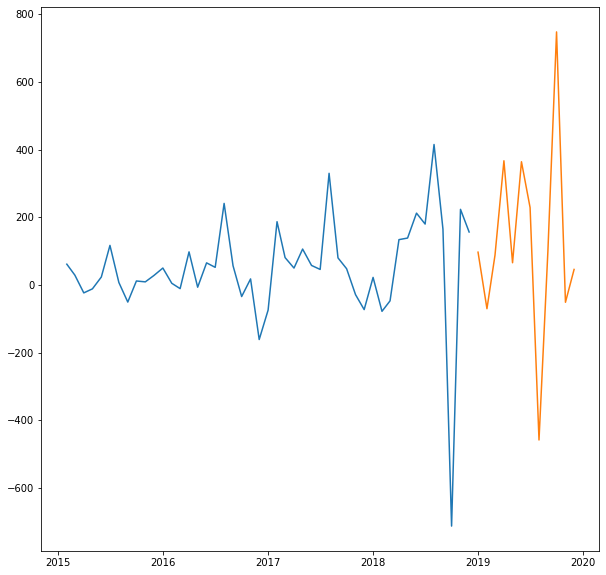

In [ ]:
plt.plot(train)
plt.plot(test)

Fitting an auto Arima model


In [ ]:
arima_model =  auto_arima(train)

In [ ]:
arima_model
#It indicates that model is a white noise.

ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

Summary of Arima Model


In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   47
Model:                        SARIMAX   Log Likelihood                -303.588
Date:                Fri, 18 Sep 2020   AIC                            611.177
Time:                        12:45:27   BIC                            614.877
Sample:                             0   HQIC                           612.569
                                 - 47                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     46.8001     27.604      1.695      0.090      -7.302     100.902
sigma2      2.388e+04   2406.897      9.921      0.000    1.92e+04    2.86e+04
===================================================================================
Ljung-Box (Q):                       20.67   Jarque-Bera (JB):               251.31
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              22.60   Skew:                            -2.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

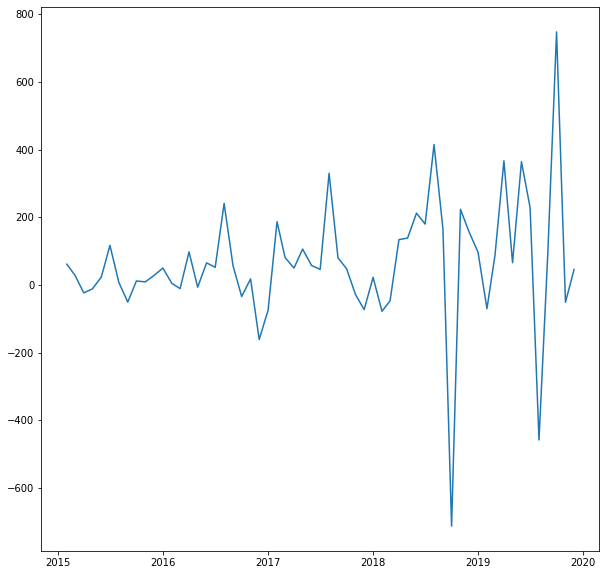

In [ ]:
plt.plot(X)

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 12),index=test.index)
prediction.columns = ['predicted_stock_value']
prediction

,predicted_stock_value
Date,
2019-01-01,46.800107
2019-02-01,46.800107
2019-03-01,46.800107
2019-04-01,46.800107
2019-05-01,46.800107
2019-06-01,46.800107
2019-07-01,46.800107
2019-08-01,46.800107
2019-09-01,46.800107


Plotting Test,training and predicted values


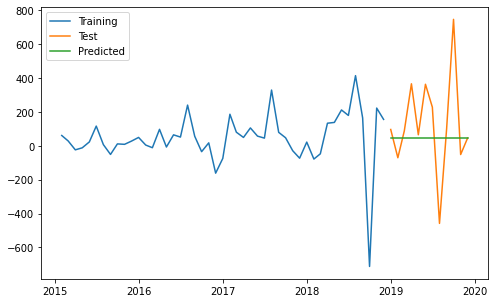

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
np.sqrt(mean_squared_error(test,prediction))

290.4738692055206

Acf and pacf plots


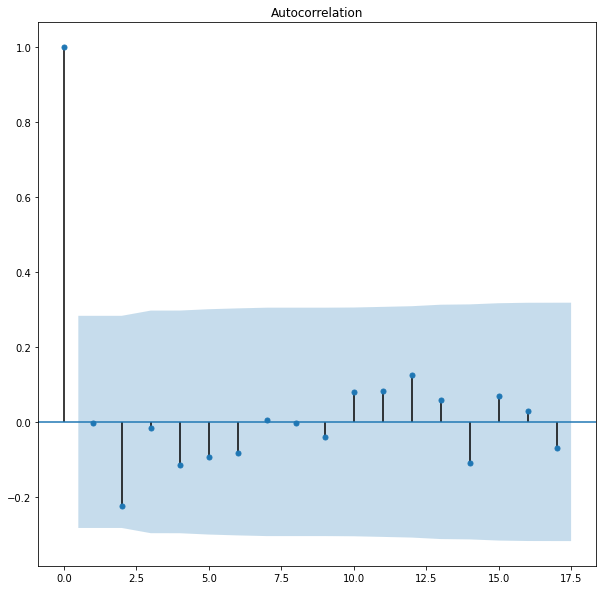

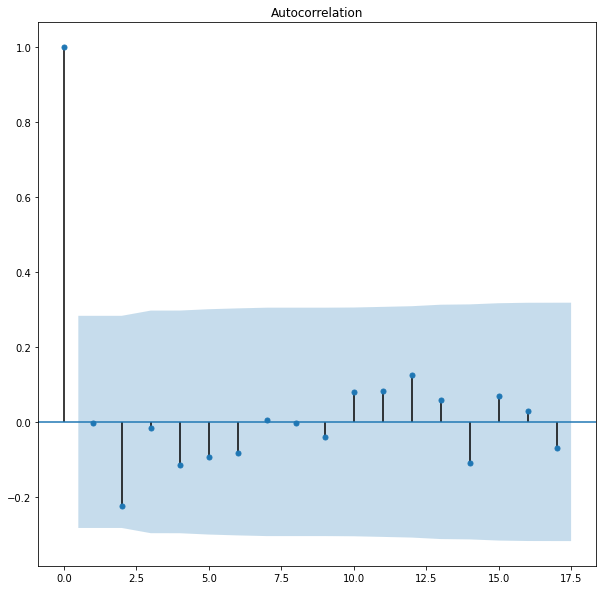

In [ ]:
plot_acf(train)

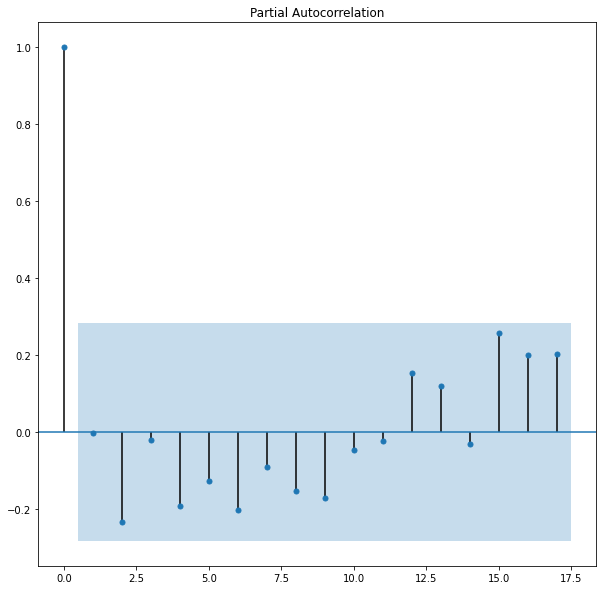

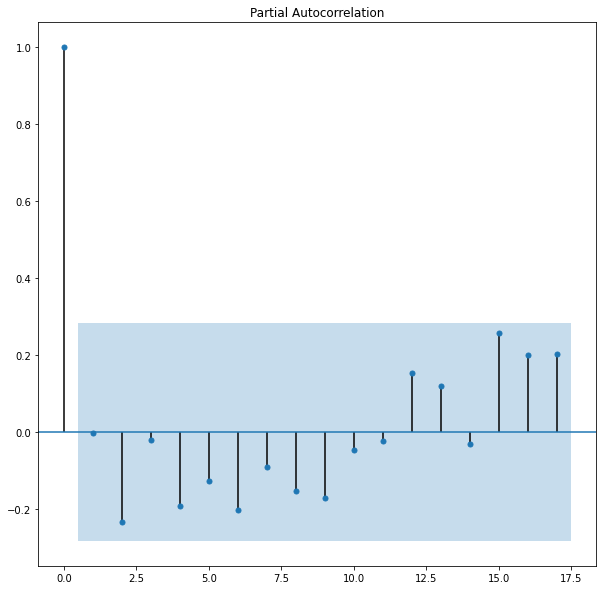

In [ ]:
plot_pacf(train)

Simple Exponential Smoothing


In [ ]:
#In fit1, we explicitly provide the model with the smoothing parameter α=0.2
#In fit2, we choose an α=0.6
#In fit3, we use the auto-optimization that allow statsmodels to automatically find an optimized value for us. This is the recommended approach.

In [ ]:
Y=stock_price['Open']
train_1=Y[0:48]
test_1=Y[48:]

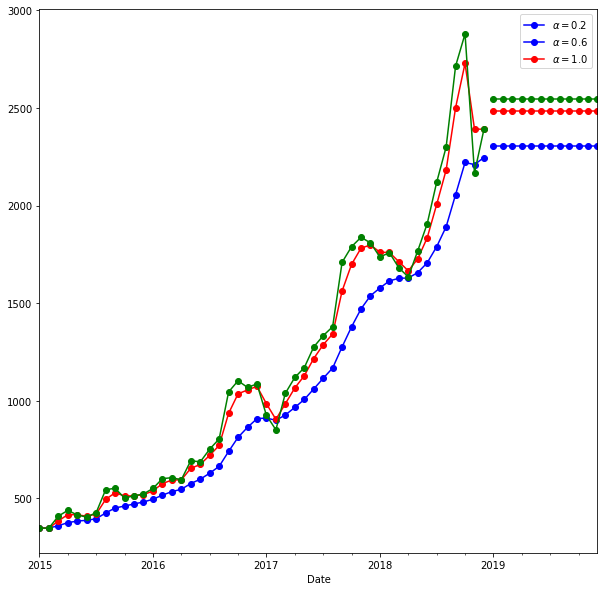

In [ ]:
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(train_1).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')

fit2 = SimpleExpSmoothing(train_1).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')


fit3 = SimpleExpSmoothing(train_1).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')




plt.show()

In [ ]:
print(fcast1.head(2),fcast2.head(2),fcast3.head(2))

2019-01-01    2307.01956
2019-02-01    2307.01956
Freq: MS, Name: $\alpha=0.2$, dtype: float64 2019-01-01    2485.519454
2019-02-01    2485.519454
Freq: MS, Name: $\alpha=0.6$, dtype: float64 2019-01-01    2548.0
2019-02-01    2548.0
Freq: MS, Name: $\alpha=1.0$, dtype: float64


In [ ]:
print(np.sqrt(mean_squared_error(test_1,fcast1)))
print(np.sqrt(mean_squared_error(test_1,fcast2)))
print(np.sqrt(mean_squared_error(test_1,fcast3)))

1148.7880138012526
993.9764729080007
941.7705696831592


In [ ]:
#So the lowest rmse score is for alpha=1

Holt’s Method

In [ ]:
#In fit1, we explicitly provide the model with the smoothing parameter α=0.8, β*=0.2.
#In fit2, we use an exponential model rather than a Holt’s additive model(which is the default).
#In fit3, we use a damped version of the Holt’s additive model but allow the dampening parameter ϕ to be optimized while fixing the values for α=0.8, β*=0.2.

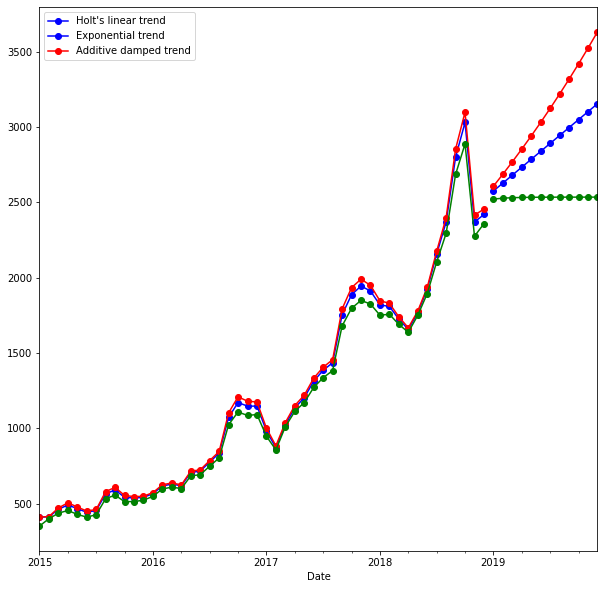

In [ ]:
fit4 = Holt(train_1).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast4 = fit4.forecast(12).rename("Holt's linear trend")

fit5 = Holt(train_1, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast5 = fit5.forecast(12).rename("Exponential trend")

fit6 = Holt(train_1, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast6 = fit6.forecast(12).rename("Additive damped trend")


fit4.fittedvalues.plot(marker="o", color='blue')
fcast4.plot(color='blue', marker="o", legend=True)
fit5.fittedvalues.plot(marker="o", color='red')
fcast5.plot(color='red', marker="o", legend=True)
fit6.fittedvalues.plot(marker="o", color='green')
fcast6.plot(color='green', marker="o", legend=True)

plt.show()

In [ ]:
print(fcast4.head(2),fcast5.head(2),fcast6.head(2))

2019-01-01    2574.820884
2019-02-01    2627.461333
Freq: MS, Name: Holt's linear trend, dtype: float64 2019-01-01    2606.653409
2019-02-01    2686.372737
Freq: MS, Name: Exponential trend, dtype: float64 2019-01-01    2521.029438
2019-02-01    2527.017019
Freq: MS, Name: Additive damped trend, dtype: float64


In [ ]:
print(np.sqrt(mean_squared_error(test_1,fcast4)))
print(np.sqrt(mean_squared_error(test_1,fcast5)))
print(np.sqrt(mean_squared_error(test_1,fcast6)))

590.6013616897626
350.75960742001075
953.7225576283539


In [ ]:
#The highest value is when alpha=0.8 and smoothing-slope=0.2 whe the model is exponential model in nature.

**Holt Winters Model**

In [ ]:
#In fit1, we use additive trend, additive seasonal of period season_length=4 and a Box-Cox transformation.
#In fit2, we use additive trend, multiplicative seasonal of period season_length=4 and a Box-Cox transformation.
#In fit3, we use additive damped trend, additive seasonal of period season_length=4 and a Box-Cox transformation.
#In fit4, we use additive damped trend, multiplicative seasonal of period season_length=4 and a Box-Cox transformation.

In [ ]:
test_1=pd.DataFrame(test_1)

            pred_values         Open        rmse
Date                                            
2019-01-01  2609.923258  2645.000000   35.076742
2019-02-01  2480.879103  2575.000000   94.120897
2019-03-01  2702.721382  2663.300049   39.421333
2019-04-01  2926.568992  3030.199951  103.630959
2019-05-01  2986.013658  3095.949951  109.936293
2019-06-01  2839.839347  3460.000000  620.160653
2019-07-01  3091.088253  3688.699951  597.611698
2019-08-01  3344.412479  3231.000000  113.412479
2019-09-01  3411.653980  3332.500000   79.153980
2019-10-01  3246.284385  4080.000000  833.715615
2019-11-01  3530.480024  4029.000000  498.519976
2019-12-01  3816.806220  4075.000000  258.193780
*****average RMSE value****
281.91286706705444


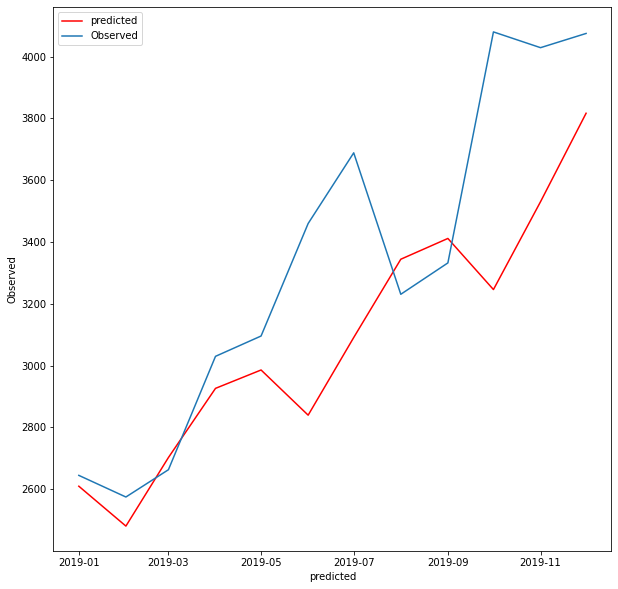

In [ ]:


for i in range(1,13):
  fit9 = ExponentialSmoothing(train_1, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
  fcast9=fit9.forecast(i)
  first_forecast=pd.DataFrame(fcast9,index=test_1.index,columns=['pred_values'])

  first_forecast=first_forecast.join(test_1)
  first_forecast['rmse']=np.sqrt(((first_forecast.pred_values - first_forecast.Open ) ** 2))
print(first_forecast)
print('*****average RMSE value****')
print(np.mean(first_forecast.rmse))
plt.plot(first_forecast.pred_values,color='r',label='predicted')
plt.plot(first_forecast.Open,label='Observed')
plt.xlabel('predicted')
plt.ylabel('Observed')
plt.legend()
plt.show()





            pred_values         Open        rmse
Date                                            
2019-01-01  2621.020226  2645.000000   23.979774
2019-02-01  2455.317846  2575.000000  119.682154
2019-03-01  2690.092479  2663.300049   26.792430
2019-04-01  2925.517495  3030.199951  104.682456
2019-05-01  2991.346010  3095.949951  104.603941
2019-06-01  2797.953425  3460.000000  662.046575
2019-07-01  3066.669440  3688.699951  622.030511
2019-08-01  3335.999049  3231.000000  104.999049
2019-09-01  3409.520807  3332.500000   77.020807
2019-10-01  3184.319867  4080.000000  895.680133
2019-11-01  3491.458630  4029.000000  537.541370
2019-12-01  3799.153985  4075.000000  275.846015
*****average RMSE value****
296.242101250482


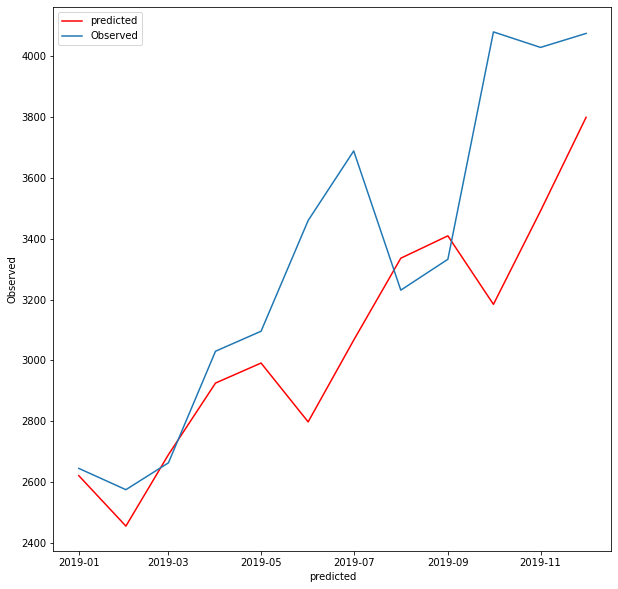

In [ ]:
for i in range(1,13):
  fit10 = ExponentialSmoothing(train_1, seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
  fcast10=fit10.forecast(i)
  second_forecast=pd.DataFrame(fcast10,index=test_1.index,columns=['pred_values'])
  second_forecast=second_forecast.join(test_1)
  second_forecast['rmse']=np.sqrt(((second_forecast.pred_values - second_forecast.Open ) ** 2))
print(second_forecast)
print('*****average RMSE value****')
print(np.mean(second_forecast.rmse))
plt.plot(second_forecast.pred_values,color='r',label='predicted')
plt.plot(second_forecast.Open,label='Observed')
plt.xlabel('predicted')
plt.ylabel('Observed')
plt.legend()
plt.show()
  

            pred_values         Open        rmse
Date                                            
2019-01-01  2610.703829  2645.000000   34.296171
2019-02-01  2465.947065  2575.000000  109.052935
2019-03-01  2684.940659  2663.300049   21.640610
2019-04-01  2925.726476  3030.199951  104.473475
2019-05-01  2981.835130  3095.949951  114.114821
2019-06-01  2818.078054  3460.000000  641.921946
2019-07-01  3065.682973  3688.699951  623.016978
2019-08-01  3337.709456  3231.000000  106.709456
2019-09-01  3401.032563  3332.500000   68.532563
2019-10-01  3216.018163  4080.000000  863.981837
2019-11-01  3495.615318  4029.000000  533.384682
2019-12-01  3802.548710  4075.000000  272.451290
*****average RMSE value****
291.131397043906


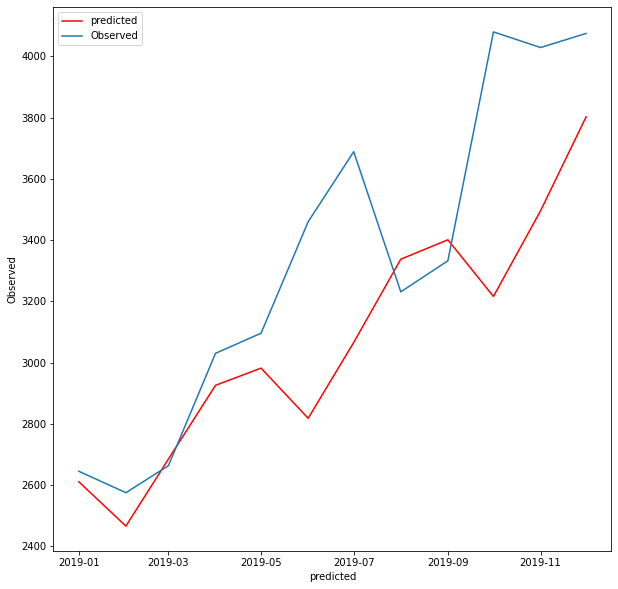

In [ ]:
for i in range(1,13):
  fit11 = ExponentialSmoothing(train_1, seasonal_periods=4, trend='add', seasonal='add',damped=True).fit(use_boxcox=True)
  fcast11=fit11.forecast(i)
  third_forecast=pd.DataFrame(fcast11,index=test_1.index,columns=['pred_values'])
  third_forecast=third_forecast.join(test_1)
  third_forecast['rmse']=np.sqrt(((third_forecast.pred_values - third_forecast.Open ) ** 2))
print(third_forecast)
print('*****average RMSE value****')
print(np.mean(third_forecast.rmse))
plt.plot(third_forecast.pred_values,color='r',label='predicted')
plt.plot(third_forecast.Open,label='Observed')
plt.xlabel('predicted')
plt.ylabel('Observed')
plt.legend()
plt.show()

            pred_values         Open         rmse
Date                                             
2019-01-01  2689.908797  2645.000000    44.908797
2019-02-01  2821.987672  2575.000000   246.987672
2019-03-01  3065.012181  2663.300049   401.712132
2019-04-01  3395.863017  3030.199951   365.663066
2019-05-01  3572.152692  3095.949951   476.202741
2019-06-01  3733.660318  3460.000000   273.660318
2019-07-01  4043.810678  3688.699951   355.110727
2019-08-01  4469.899193  3231.000000  1238.899193
2019-09-01  4685.166587  3332.500000  1352.666587
2019-10-01  4878.984413  4080.000000   798.984413
2019-11-01  5269.321194  4029.000000  1240.321194
2019-12-01  5810.721896  4075.000000  1735.721896
*****average RMSE value****
710.9032279319126


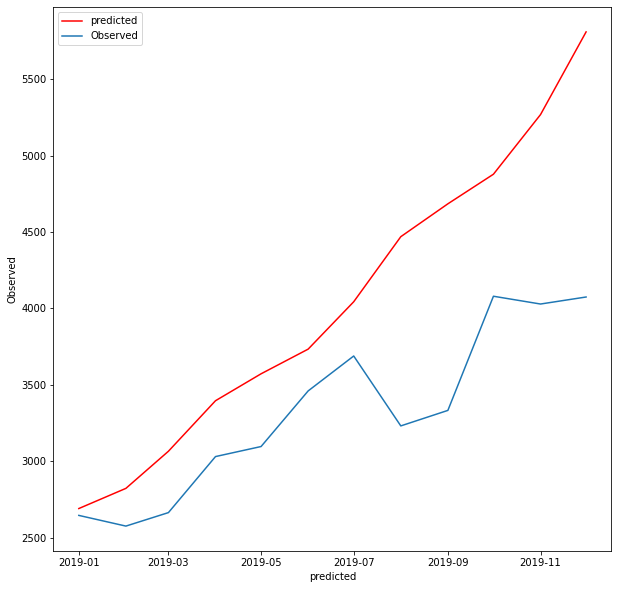

In [ ]:

for i in range(1,13):
  fit12 = ExponentialSmoothing(train_1, seasonal_periods=4, trend='mul', seasonal='mul',damped=True,).fit(use_boxcox=True)
  fcast12=fit12.forecast(i)
  fourth_forecast=pd.DataFrame(fcast12,index=test_1.index,columns=['pred_values'])
  fourth_forecast=fourth_forecast.join(test_1)
  fourth_forecast['rmse']=np.sqrt(((fourth_forecast.pred_values - fourth_forecast.Open ) ** 2))
print(fourth_forecast)
print('*****average RMSE value****')
print(np.mean(fourth_forecast.rmse))
plt.plot(fourth_forecast.pred_values,color='r',label='predicted')
plt.plot(fourth_forecast.Open,label='Observed')
plt.xlabel('predicted')
plt.ylabel('Observed')
plt.legend()
plt.show()


In [ ]:
#The holt winter is giving me lowest RMSE when trend and seasonality is additive and damped=True

Regression Analysis


In [ ]:
#Here we are going to apply Regression Analysis Using Linear Regression,Random Forest,GBM.
#I will have my opening price as my dependent Variable

In [ ]:
stock_price.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,348.394989,449.239990,339.220001,405.054993,373.992950,12293830
2015-02-01,409.899994,439.885010,396.500000,410.709991,379.214294,5212560
2015-03-01,439.049988,447.700012,390.114990,410.845001,379.338959,5849590
2015-04-01,415.799988,469.899994,391.350006,404.429993,373.415894,6898600
2015-05-01,404.429993,460.000000,391.959991,421.654999,389.319977,7366890


In [ ]:
stock_price.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.568112,0.992535,0.551992,0.578731,0.432473
High,0.568112,1.000000,0.565501,0.997126,0.996938,0.163095
Low,0.992535,0.565501,1.000000,0.556583,0.583422,0.369582
Close,0.551992,0.997126,0.556583,1.000000,0.999444,0.136652
Adj Close,0.578731,0.996938,0.583422,0.999444,1.000000,0.151389
Volume,0.432473,0.163095,0.369582,0.136652,0.151389,1.000000


In [ ]:
#As we see there is a  high correlation between certain factors ,so we will use VIF and if VIF>10,we will drop that column.

Variance inflation Factor


In [ ]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)


In [ ]:
stock_price1=stock_price.drop('Open',1)
calc_vif(stock_price1)
# we see close and adj_close have high vif but since Close has more VIF,I will drop it

,variables,VIF
0,High,653.339418
1,Low,45.993743
2,Close,29876.240780
3,Adj Close,29791.819976
4,Volume,3.474237


In [ ]:
stock_price.drop('Close',1,inplace=True)

In [ ]:
stock_price.corr()

,Open,High,Low,Adj Close,Volume
Open,1.000000,0.568112,0.992535,0.578731,0.432473
High,0.568112,1.000000,0.565501,0.996938,0.163095
Low,0.992535,0.565501,1.000000,0.583422,0.369582
Adj Close,0.578731,0.996938,0.583422,1.000000,0.151389
Volume,0.432473,0.163095,0.369582,0.151389,1.000000


In [ ]:
stock_price1=stock_price.drop('Open',1)
calc_vif(stock_price1)
#Now since High and Adj close have high correlation,we will drop Adj close since it has a high Vif


,variables,VIF
0,High,597.195846
1,Low,6.245184
2,Adj Close,610.543919
3,Volume,3.474165


In [ ]:
stock_price.drop('Adj Close',1,inplace=True)

In [ ]:
stock_price1=stock_price.drop('Open',1)
calc_vif(stock_price1)

,variables,VIF
0,High,4.101211
1,Low,5.357564
2,Volume,3.056312


In [ ]:
stock_price.head()

,Open,High,Low,Volume
Date,,,,
2015-01-01,348.394989,449.239990,339.220001,12293830
2015-02-01,409.899994,439.885010,396.500000,5212560
2015-03-01,439.049988,447.700012,390.114990,5849590
2015-04-01,415.799988,469.899994,391.350006,6898600
2015-05-01,404.429993,460.000000,391.959991,7366890


Linear Regression


In [ ]:
lr=LinearRegression(normalize=True)

In [ ]:
X=stock_price.drop('Open',1)
y=stock_price['Open']

In [ ]:
X_train=X[0:48]
X_test=X[48:60]
y_train=y[0:48]
y_test=y[48:60]


In [ ]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
lr_predict=lr.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(lr_predict,y_test))

146.08391248363654

In [ ]:
np.mean(lr_predict)

3331.593037581124

In [ ]:
np.sqrt(mean_squared_error(lr_predict,y_test))/np.mean(test)
#Error is 11.5%

1.1535922726339591

In [ ]:
X.head()

,High,Low,Volume
Date,,,
2015-01-01,449.239990,339.220001,12293830
2015-02-01,439.885010,396.500000,5212560
2015-03-01,447.700012,390.114990,5849590
2015-04-01,469.899994,391.350006,6898600
2015-05-01,460.000000,391.959991,7366890


OLS regression

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                   Open   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              5881.
Date:                Fri, 18 Sep 2020   Prob (F-statistic):                    5.74e-71
Time:                        13:23:59   Log-Likelihood:                         -367.87
No. Observations:                  60   AIC:                                      741.7
Df Residuals:                      57   BIC:                                      748.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
#Building a model by dropping High value.

In [ ]:
X=stock_price.drop(['Open','High'],1)
y=stock_price['Open']

In [ ]:
X_train=X[0:48]
X_test=X[48:60]
y_train=y[0:48]
y_test=y[48:60]

In [ ]:
lr.fit(X_train,y_train)
lr_predict=lr.predict(X_test)
np.sqrt(mean_squared_error(lr_predict,y_test))

146.7946166926713

In [ ]:
np.mean(lr_predict)

3325.289488999834

In [ ]:
np.sqrt(mean_squared_error(lr_predict,y_test))/np.mean(test)


1.1535922726339591

OLS regression

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Open   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              8975.
Date:                Fri, 18 Sep 2020   Prob (F-statistic):                    5.37e-73
Time:                        13:26:30   Log-Likelihood:                         -367.87
No. Observations:                  60   AIC:                                      739.7
Df Residuals:                      58   BIC:                                      743.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Heteroskadiscity test


In [ ]:
#testing for heteroskadiscity 

print('Brusche pagan lm test statistic :',dg.het_breuschpagan(results.resid,exog_het=X)[0])
print('Brusche pagan lm test p value :',dg.het_breuschpagan(results.resid,exog_het=X)[1])



Brusche pagan lm test statistic : 11.885960898097201
Brusche pagan lm test p value : 0.0005655863919560253


In [ ]:
#it is heteroskadistic in nature

*Autocorrelation* Test

In [ ]:
#checking for autocorrelation using Durbin Watson

db=durbin_watson(results.resid) 
db

2.132143414251521

Random Forest Regressor


This is the base model of Random Forest

In [ ]:
X1=stock_price_copy.drop('Open',1)
y1=stock_price_copy['Open']

In [ ]:
X1_train=X1[0:48]
X1_test=X1[48:60]
y1_train=y1[0:48]
y1_test=y1[48:60]

In [ ]:
rf=RandomForestRegressor()
rf.fit(X1_train,y1_train)
rf_pred1=rf.predict(X1_test)


In [ ]:
np.sqrt(mean_squared_error(y1_test,rf_pred1))

879.6120699309874

In [ ]:
np.sqrt(mean_squared_error(y_test,rf_pred1))/np.mean(y_test)#Model has 74% accuracy

0.2645075287608042

Random Forest Regressor with Grid Search

In [ ]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

In [ ]:
def mse(y_act, y_pred):
  return np.sqrt(mean_squared_error(y_act,y_pred))

rmse = make_scorer(mse)

In [ ]:
params = {  "n_estimators": [10,20,30,100,200,300,350,400],"max_features": ["auto", "sqrt", "log2"],"min_samples_split" : [2,4,8],"bootstrap": [True, False],'max_depth':[1,3,5,7,9]}


In [ ]:
best_rf=GridSearchCV(rf,param_grid=params,n_jobs=-1,cv=3)

In [ ]:
%%time
best_rf.fit(X1_train,y1_train)

CPU times: user 11.4 s, sys: 167 ms, total: 11.5 s
Wall time: 5min 40s


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
best_rf.best_params_

{'bootstrap': False,
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
best_rf_predict=best_rf.predict(X1_test)

In [ ]:
np.sqrt(mean_squared_error(y1_test,best_rf_predict))

801.5004181985593

In [ ]:
np.mean(y1_test)

3325.470825166667

In [ ]:
error=np.sqrt(mean_squared_error(y1_test,best_rf_predict))/np.mean(y1_test)
error

0.24101862874060528

In [ ]:
#This indicates that model with hyperparameter tuning does better than base model

SVM

SVM(linear model)


In [ ]:
svc=SVR(kernel='linear')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
#Scaling The data,so the svc can converge fast.

In [ ]:
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,index=X.index)
X2_train=X_scaled[0:48]
X2_test=X_scaled[48:60]


In [ ]:
svc.fit(X2_train,y1_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svc_pred=svc.predict(X2_test)

In [ ]:
rmse_svr=np.sqrt(mean_squared_error(y1_test,svc_pred))

In [ ]:
rmse_svr
#If we dont scale dependent and independent variables both rmse will be very high.

2258.1399273892353

In [ ]:
y_new=stock_price_copy['Open'].values.reshape(-1,1)

Scaling both *Dependent and independent variables*

In [ ]:
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,index=X.index)
y_scaled=sc.fit_transform(y_new)
y_scaled=pd.DataFrame(y_scaled,index=y.index)
X2_train=X_scaled[0:48]
X2_test=X_scaled[48:60]
y2_train=y_scaled[0:48]
y2_test=y_scaled[48:]

In [ ]:
svc.fit(X2_train,y2_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svc_pred_new=svc.predict(X2_test)

In [ ]:
rmse_svr_new=np.sqrt(mean_squared_error(y2_test,svc_pred_new))
rmse_svr_new

0.1481969976388901

Reverse scaling


In [ ]:
y_pred_svc = sc.inverse_transform(svc_pred_new)
y_pred_svc

array([2473.14758456, 2593.63221108, 2730.88250096, 3044.67326268,
       2994.82301684, 3494.34992605, 3223.57096659, 3149.70007449,
       3348.42047496, 3950.11636786, 4122.67093304, 3978.02332402])

In [ ]:
rmse_svr_new_final=np.sqrt(mean_squared_error(y1_test,y_pred_svc))
rmse_svr_new_final

159.24834891863355

In [ ]:
rmse_svr_new_final/np.mean(y1_test)

0.04788745933762696

SVR with kernel 'RBF'

In [ ]:
svc1=SVR(kernel='rbf')

In [ ]:
svc1.fit(X2_train,y2_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svc_pred_rbf=svc1.predict(X2_test)

In [ ]:
rmse_svr_rbf=np.sqrt(mean_squared_error(y2_test,svc_pred_rbf))
rmse_svr_rbf

1.216401075157899

In [ ]:
y_pred_rbf = sc.inverse_transform(svc_pred_rbf)
y_pred_rbf

array([2447.08423844, 2538.30189114, 2572.92601156, 2451.95446451,
       2431.25148134, 2230.53649268, 2018.78552502, 2352.86459622,
       2282.52657446, 1958.07952065, 1889.48818736, 1971.72590866])

In [ ]:
rmse_svr_rbf_final=np.sqrt(mean_squared_error(y1_test,y_pred_rbf))
rmse_svr_rbf_final

1307.110575301645

In [ ]:
rmse_svr_rbf_final/np.mean(y1_test)

0.39306030454684104

SVR kernel polynomial

In [ ]:
svc2=SVR(kernel='poly')
svc2.fit(X2_train,y2_train)
svc_poly=svc2.predict(X2_test)
rmse_svr_poly=np.sqrt(mean_squared_error(y2_test,svc_poly))
print(rmse_svr_poly)
y_pred_poly = sc.inverse_transform(svc_poly)
print(y_pred_poly)
rmse_svr_poly_final=np.sqrt(mean_squared_error(y1_test,y_pred_poly))
print(rmse_svr_poly_final)
rmse_svr_poly_final/np.mean(y1_test)

4.698155744923511
[ 1985.05508948  2352.68592719  2740.57725467  4327.63811181
  3404.65937575  7764.43751765  3970.19659393  4134.99314193
  5527.82691982 12038.44518904 15489.82046618 13275.44209718]
5048.506766410532


1.5181329296904924

***Analysis***

In [ ]:
#Out of all the models that I have built the best results is given by Linear Regression